In [3]:
import torch
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [4]:
##Change working directory to talk-berty-to-me root
import os
os.chdir("D:/University/Projects/AML/talk-berty-to-me")

In [5]:
#Reading data from Project Gutenberg
data_gutenberg = pd.read_csv('data/books_and_genres.csv')

In [6]:
#Selecting relevant columns
data_gutenberg = data_gutenberg.loc[:,['title', 'text', 'genres']]
data_gutenberg.head(3)

,title,text,genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Di...","{'21st-century', 'history', 'roman', 'classics..."
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic..."
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '..."


In [7]:
universal_set = set()
def parse_set(string_set):
    return ast.literal_eval(string_set)

for string in list(zip(data_gutenberg['genres'])):
    parsed_set = parse_set(string[0])
    universal_set = universal_set.union(parsed_set)

In [8]:
universal_set_list = list(universal_set)

In [9]:
def OneHotEncodeGenres(genres):
    return [1 if genre in genres else 0 for genre in universal_set_list]

data_gutenberg.loc[:,'genre_one_hot'] = data_gutenberg['genres'].apply(lambda x: OneHotEncodeGenres(x))


In [11]:
genre_df = pd.DataFrame(data_gutenberg['genres'])
for genre in universal_set_list:
    genre_df[genre] = genre_df['genres'].apply(lambda x: 1 if genre in x else 0)

genre_df.head(3)

C:\Users\setul\AppData\Local\Temp\ipykernel_24420\1368203545.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  genre_df[genre] = genre_df['genres'].apply(lambda x: 1 if genre in x else 0)


,genres,amazon,biography,adult-fiction,literary-fiction,essays,animals,realistic-fiction,religion,drama,...,suspense,adventure,politics,family,dark,supernatural,speculative-fiction,bdsm,new-adult,art
0,"{'21st-century', 'history', 'roman', 'classics...",0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,"{'horror', 'mystery', 'classics', 'science-fic...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2,"{'literary-fiction', 'history', 'biography', '...",0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


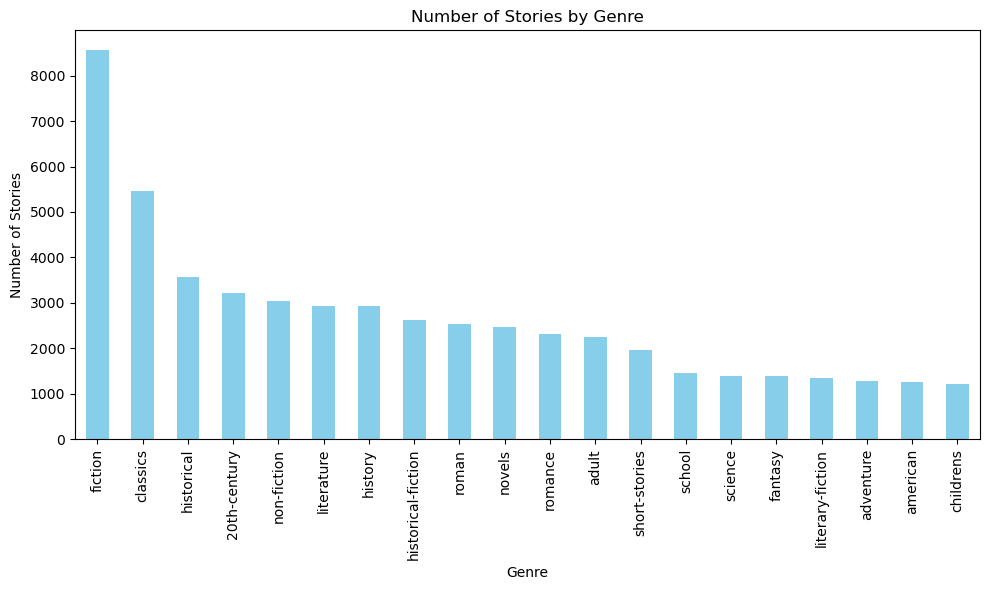

In [12]:
#Plotting number of stories by genre
genre_counts = genre_df.drop(columns=['genres']).sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Stories by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Stories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

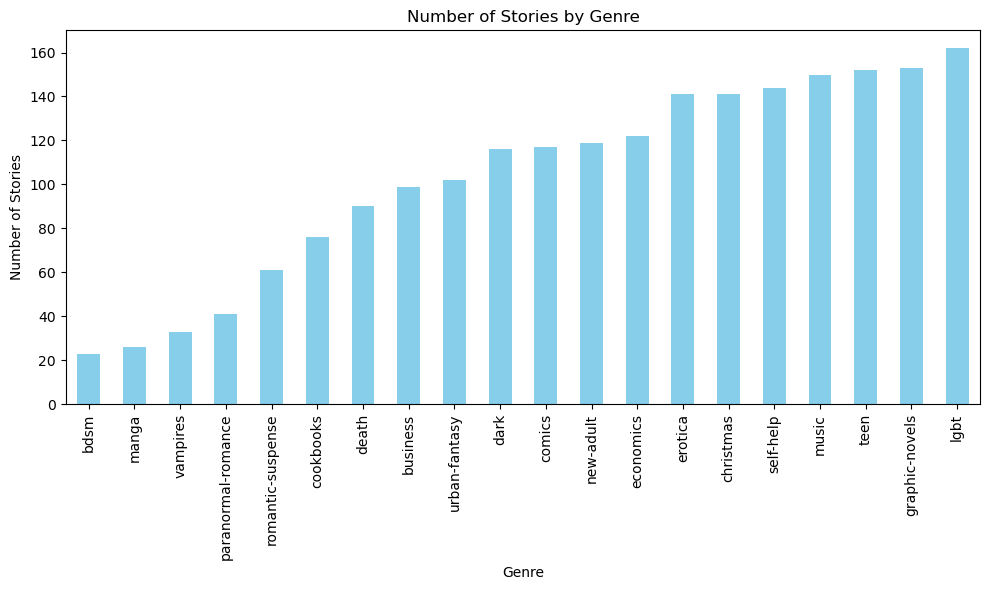

In [13]:
#Plotting number of stories by genre
genre_counts = genre_df.drop(columns=['genres']).sum().sort_values()[:20]
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Stories by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Stories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()